## ACI Finance Results

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import requests

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the file path in your Google Drive
file_path = "/content/drive/MyDrive/Differential PCA, rough volatility models and financial time series/Data/Data_used/acfinance.txt"

# Initialize a list to store the closing prices
close_prices = []

# Open and read the file
with open(file_path, "r") as file:
    for line in file:
        # Convert each line to a float and append it to the list
        close_prices.append(float(line.strip()))

# Display the extracted closing prices
print("Closing Prices:", close_prices)

Closing Prices: [34.269991, 33.950011, 33.639991, 33.24999, 32.97999, 33.129991, 32.849999, 33.230009, 33.759991, 33.36999, 32.180011, 32.910001, 33.050011, 32.949989, 32.75001, 33.150001, 33.21999, 33.02001, 32.570011, 32.919989, 33.699989, 33.84999, 34.13001, 34.419989, 34.89, 35.169989, 35.300011, 35.319989, 36.009991, 35.450011, 35.78001, 35.300011, 35.70999, 35.90001, 35.199989, 35.330011, 35.939999, 36.09999, 36.200011, 36.99, 37.26, 36.569999, 37.199999, 37.349999, 37.52001, 36.63, 36.680011, 37.329989, 37.410001, 37.430011, 37.560001, 37.700011, 37.52001, 37.23999, 36.87, 36.29001, 35.300011, 35.300011, 34.98999, 31.199999, 30.89001, 30.930001, 30.590009, 29.00001, 29.670001, 29.849999, 28.79001, 28.71999, 28.550011, 29.210009, 29.570011, 29.579999, 30.429989, 31.059989, 31.929989, 31.709999, 31.449989, 31.730009, 32.169989, 32.39001, 32.51001, 32.889991, 32.73, 32.799989, 32.66001, 32.919989, 32.52, 32.400001, 32.25, 32.280001, 32.10999, 31.820011, 31.269991, 31.340009, 31.449

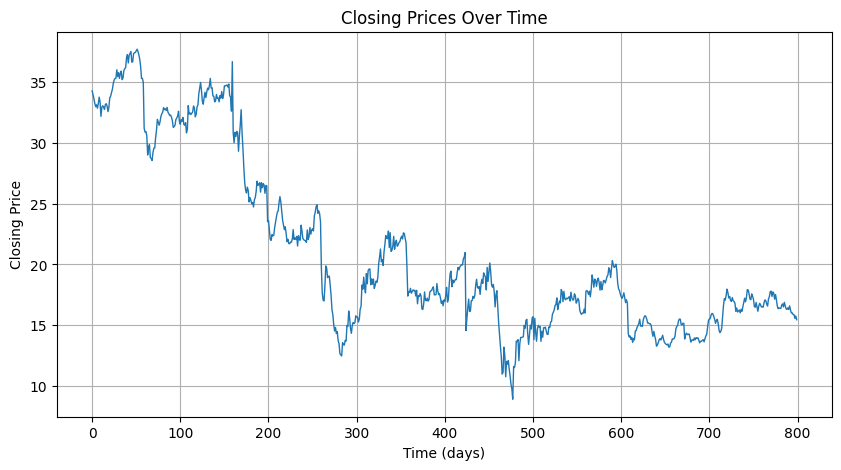

In [5]:
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(10, 5))
plt.plot(close_prices, linestyle='-', linewidth=1)
plt.title("Closing Prices Over Time")
plt.xlabel("Time (days)")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

In [6]:
first_diff = np.diff(close_prices)
len(first_diff)
first_diff

array([-0.31998 , -0.31002 , -0.390001, -0.27    ,  0.150001, -0.279992,
        0.38001 ,  0.529982, -0.390001, -1.189979,  0.72999 ,  0.14001 ,
       -0.100022, -0.199979,  0.399991,  0.069989, -0.19998 , -0.449999,
        0.349978,  0.78    ,  0.150001,  0.28002 ,  0.289979,  0.470011,
        0.279989,  0.130022,  0.019978,  0.690002, -0.55998 ,  0.329999,
       -0.479999,  0.409979,  0.19002 , -0.700021,  0.130022,  0.609988,
        0.159991,  0.100021,  0.789989,  0.27    , -0.690001,  0.63    ,
        0.15    ,  0.170011, -0.89001 ,  0.050011,  0.649978,  0.080012,
        0.02001 ,  0.12999 ,  0.14001 , -0.180001, -0.28002 , -0.36999 ,
       -0.57999 , -0.989999,  0.      , -0.310021, -3.789991, -0.309989,
        0.039991, -0.339992, -1.589999,  0.669991,  0.179998, -1.059989,
       -0.07002 , -0.169979,  0.659998,  0.360002,  0.009988,  0.84999 ,
        0.63    ,  0.87    , -0.21999 , -0.26001 ,  0.28002 ,  0.43998 ,
        0.220021,  0.12    ,  0.379981, -0.159991, 

In [7]:
import numpy as np
from scipy.signal import savgol_filter

In [9]:
from os import close
# Parameters for Savitzky-Golay Filter tailored for stock price data
# found by grid search over different values
window_length = 5  # short window to capture quick price changes
poly_order = 3     # low polynomial order to avoid overfitting

# Smoothed data and first derivative for rate of change
smoothed_data = savgol_filter(close_prices, window_length, poly_order)
first_derivative = savgol_filter(close_prices, window_length, poly_order, deriv=1)

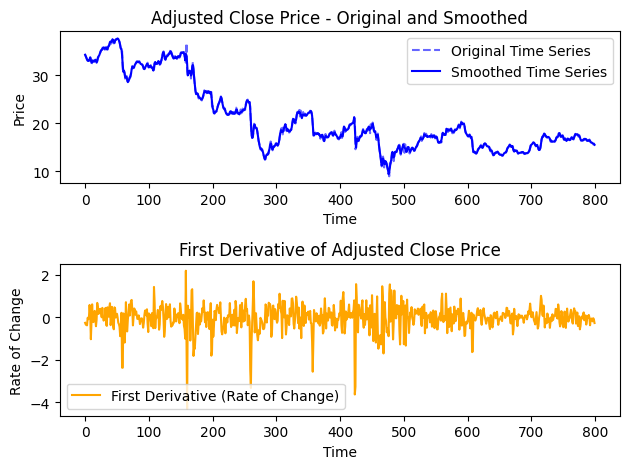

In [10]:
# Plot original (smoothed) time series data
plt.subplot(2, 1, 1)
plt.plot(close_prices, label='Original Time Series', color='blue', linestyle='--', alpha=0.6)
plt.plot(smoothed_data, label='Smoothed Time Series', color='blue')
plt.title('Adjusted Close Price - Original and Smoothed')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot first derivative of the time series
plt.subplot(2, 1, 2)
plt.plot(first_derivative, label='First Derivative (Rate of Change)', color='orange')
plt.title('First Derivative of Adjusted Close Price')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
close_prices = np.array(close_prices)
first_derivative = np.array(first_derivative)

In [12]:
import numpy as np

# Find the maximum absolute value across both series
max_abs_value = max(np.max(np.abs(close_prices)), np.max(np.abs(first_derivative)))

# Scale the series to [-0.9, 0.9]
desired_range = 0.9 #range selected for comparative purposes
scaled_ACI_original = (close_prices / max_abs_value) * desired_range
scaled_diff_correct = (first_derivative / max_abs_value) * desired_range

In [13]:
print(f"New Scaled Original Series Range: {scaled_ACI_original.min()} to {scaled_ACI_original.max()}")
print(f"New Scaled Differential Series Range: {scaled_diff_correct.min()} to {scaled_diff_correct.max()}")

New Scaled Original Series Range: 0.21294399622323715 to 0.9
New Scaled Differential Series Range: -0.10267272004244254 to 0.0524402791288311


In [14]:
def verify_differential_signs(original_series, derivative_series):
    discrepancies = []
    for i in range(1, len(original_series)):
        delta = original_series[i] - original_series[i - 1]
        derivative = derivative_series[i - 1]
        # Check for sign correspondence
        if (delta < 0 and derivative > 0) or (delta > 0 and derivative < 0):
            discrepancies.append((i, delta, derivative))
    return discrepancies

# Use the scaled series for verification
discrepancies = verify_differential_signs(scaled_ACI_original, scaled_diff_correct)

print(f"Number of discrepancies: {len(discrepancies)} out of {len(scaled_ACI_original) - 1}")

Number of discrepancies: 215 out of 799


In [15]:
# Assuming scaled_ACI_original and scaled_diff_correct are already defined and have lengths of 800
# scaled_ACI_original = scaled_ACI_original.flatten()
# scaled_diff_correct = scaled_diff_correct.flatten()

# Recalculate the exact minimum length across all series for proper alignment
min_length_input = len(scaled_ACI_original) - 10  # Adjusting based on the offset needed for inputs
min_length_output = len(scaled_ACI_original) - 15  # Further reduced for outputs to align properly

# Use the smaller of the two lengths to ensure all columns align
final_consistent_length = min(min_length_input, min_length_output)

# Initialize a new DataFrame for the corrected output
formatted_df_corrected_final_ACI = pd.DataFrame()

# Add the first five columns as Input1...Input5 using scaled_ACI_original
for i in range(5):
    formatted_df_corrected_final_ACI[f'Input{i+1}'] = scaled_ACI_original[i:final_consistent_length + i]

# Add the next four columns as Input_Differential1...Input_Differential4 using scaled_diff_correct
for i in range(4):
    formatted_df_corrected_final_ACI[f'Input_Differential{i+1}'] = scaled_diff_correct[i:final_consistent_length + i]

# Add the next ten columns as Output1...Output10 using scaled_ACI_original
for i in range(10):
    formatted_df_corrected_final_ACI[f'Output{i+1}'] = scaled_ACI_original[(i + 5):(final_consistent_length + i + 5)]

# Add the next ten columns as Output_Differential1...Output_Differential10 using scaled_diff_correct
for i in range(10):
    formatted_df_corrected_final_ACI[f'Output_Differential{i+1}'] = scaled_diff_correct[(i + 4):(final_consistent_length + i + 4)]

# Ensure all columns have the same length by truncating to the smallest consistent length
formatted_df_corrected_final_ACI = formatted_df_corrected_final_ACI.iloc[18:final_consistent_length]
formatted_df_corrected_final_ACI = formatted_df_corrected_final_ACI.reset_index(drop=True)

# Display the first 10 rows of the DataFrame
formatted_df_corrected_final_ACI.head(15)


,Input1,Input2,Input3,Input4,Input5,Input_Differential1,Input_Differential2,Input_Differential3,Input_Differential4,Output1,...,Output_Differential1,Output_Differential2,Output_Differential3,Output_Differential4,Output_Differential5,Output_Differential6,Output_Differential7,Output_Differential8,Output_Differential9,Output_Differential10
0,0.777533,0.785888,0.804509,0.808090,0.814775,-0.002547,0.016333,0.011698,0.003860,0.821697,...,0.006704,0.009469,0.009609,0.004735,0.000159,0.010742,0.001114,-0.003620,-0.001790,-0.002010
1,0.785888,0.804509,0.808090,0.814775,0.821697,0.016333,0.011698,0.003860,0.006704,0.832918,...,0.009469,0.009609,0.004735,0.000159,0.010742,0.001114,-0.003620,-0.001790,-0.002010,0.010703
2,0.804509,0.808090,0.814775,0.821697,0.832918,0.011698,0.003860,0.006704,0.009469,0.839602,...,0.009609,0.004735,0.000159,0.010742,0.001114,-0.003620,-0.001790,-0.002010,0.010703,-0.008176
3,0.808090,0.814775,0.821697,0.832918,0.839602,0.003860,0.006704,0.009469,0.009609,0.842706,...,0.004735,0.000159,0.010742,0.001114,-0.003620,-0.001790,-0.002010,0.010703,-0.008176,-0.009529
4,0.814775,0.821697,0.832918,0.839602,0.842706,0.006704,0.009469,0.009609,0.004735,0.843183,...,0.000159,0.010742,0.001114,-0.003620,-0.001790,-0.002010,0.010703,-0.008176,-0.009529,0.011380
5,0.821697,0.832918,0.839602,0.842706,0.843183,0.009469,0.009609,0.004735,0.000159,0.859655,...,0.010742,0.001114,-0.003620,-0.001790,-0.002010,0.010703,-0.008176,-0.009529,0.011380,0.010265
6,0.832918,0.839602,0.842706,0.843183,0.859655,0.009609,0.004735,0.000159,0.010742,0.846286,...,0.001114,-0.003620,-0.001790,-0.002010,0.010703,-0.008176,-0.009529,0.011380,0.010265,0.000836
7,0.839602,0.842706,0.843183,0.859655,0.846286,0.004735,0.000159,0.010742,0.001114,0.854164,...,-0.003620,-0.001790,-0.002010,0.010703,-0.008176,-0.009529,0.011380,0.010265,0.000836,0.011539
8,0.842706,0.843183,0.859655,0.846286,0.854164,0.000159,0.010742,0.001114,-0.003620,0.842706,...,-0.001790,-0.002010,0.010703,-0.008176,-0.009529,0.011380,0.010265,0.000836,0.011539,0.015935
9,0.843183,0.859655,0.846286,0.854164,0.842706,0.010742,0.001114,-0.003620,-0.001790,0.852493,...,-0.002010,0.010703,-0.008176,-0.009529,0.011380,0.010265,0.000836,0.011539,0.015935,-0.008674


In [16]:
print(formatted_df_corrected_final_ACI.shape)

(767, 29)


In [17]:
# Step 1: Create the Training DataFrame (First 580 Rows)
train_data_scaled_ACI_final = formatted_df_corrected_final_ACI.iloc[:460].reset_index(drop=True)

# Step 2: Create the Testing DataFrame (Remaining Rows)
test_data_scaled_ACI_final = formatted_df_corrected_final_ACI.iloc[460:].reset_index(drop=True)

# Step 3: Create the Testing DataFrame Without Output and Output Differential Columns
# Drop the Output and Output_Differential columns
columns_to_drop = [col for col in formatted_df_corrected_final_ACI.columns if 'Output' in col]
test_data_scaled_without_output = test_data_scaled_ACI_final.drop(columns=columns_to_drop).reset_index(drop=True)

# train_unscaled_df.head(20)
# test_unscaled_df.tail(5)
test_data_scaled_without_output.tail(5)

,Input1,Input2,Input3,Input4,Input5,Input_Differential1,Input_Differential2,Input_Differential3,Input_Differential4
302,0.391273,0.391273,0.397480,0.400106,0.394138,-0.001214,0.003482,0.005650,-0.003223
303,0.391273,0.397480,0.400106,0.394138,0.403209,0.003482,0.005650,-0.003223,0.002168
304,0.397480,0.400106,0.394138,0.403209,0.396286,0.005650,-0.003223,0.002168,0.002228
305,0.400106,0.394138,0.403209,0.396286,0.390557,-0.003223,0.002168,0.002228,-0.008017
306,0.394138,0.403209,0.396286,0.390557,0.389124,0.002168,0.002228,-0.008017,-0.003859


In [18]:
train_df = train_data_scaled_ACI_final
test_df = test_data_scaled_ACI_final

# Display the first few rows of the datasets to understand their structure
train_df.head(), test_df.head()

(     Input1    Input2    Input3    Input4    Input5  Input_Differential1  \
 0  0.777533  0.785888  0.804509  0.808090  0.814775            -0.002547   
 1  0.785888  0.804509  0.808090  0.814775  0.821697             0.016333   
 2  0.804509  0.808090  0.814775  0.821697  0.832918             0.011698   
 3  0.808090  0.814775  0.821697  0.832918  0.839602             0.003860   
 4  0.814775  0.821697  0.832918  0.839602  0.842706             0.006704   
 
    Input_Differential2  Input_Differential3  Input_Differential4   Output1  \
 0             0.016333             0.011698             0.003860  0.821697   
 1             0.011698             0.003860             0.006704  0.832918   
 2             0.003860             0.006704             0.009469  0.839602   
 3             0.006704             0.009469             0.009609  0.842706   
 4             0.009469             0.009609             0.004735  0.843183   
 
    ...  Output_Differential1  Output_Differential2  Output_

In [19]:
# Extracting inputs and outputs for training
X_train_original = train_df[['Input1', 'Input2', 'Input3', 'Input4', 'Input5']].values.reshape(-1, 5, 1)
X_train_diff = train_df[['Input_Differential1', 'Input_Differential2', 'Input_Differential3', 'Input_Differential4']].values.reshape(-1, 4, 1)

# Outputs
# Identify the output columns (assuming they are named Output1, Output2, ..., Output10)
output_columns = [f'Output{i+1}' for i in range(10)]

# Extract Y_train for original outputs using the identified columns
Y_train_original = train_df[output_columns].values
Y_train_diff = train_df[[col for col in train_df.columns if 'Output_Differential' in col]].values

# Reshape the test data in the same way
X_test_original = test_df[['Input1', 'Input2', 'Input3', 'Input4', 'Input5']].values.reshape(-1, 5, 1)
X_test_diff = test_df[['Input_Differential1', 'Input_Differential2', 'Input_Differential3', 'Input_Differential4']].values.reshape(-1, 4, 1)

# Extract the test ground truth outputs (original and differential)
Y_test_original = test_df[['Output1', 'Output2', 'Output3', 'Output4', 'Output5',
                                       'Output6', 'Output7', 'Output8', 'Output9', 'Output10']].values
Y_test_diff = test_df[[col for col in test_df.columns if 'Output_Differential' in col]].values

# Confirming the shapes
X_train_original.shape, X_train_diff.shape, Y_train_original.shape, Y_train_diff.shape, X_test_original.shape, X_test_diff.shape, Y_test_original.shape, Y_test_diff.shape

((460, 5, 1),
 (460, 4, 1),
 (460, 10),
 (460, 10),
 (307, 5, 1),
 (307, 4, 1),
 (307, 10),
 (307, 10))

In [20]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version: ", tf.__version__)

# Print details of the GPU if available
gpu_devices = tf.config.list_physical_devices('GPU')
for gpu in gpu_devices:
    print(gpu)

Num GPUs Available:  1
TensorFlow version:  2.18.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [21]:
# ************Using Custom Loss Functions*********
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model
import numpy as np
import time

def rmse(y_true, y_pred):
    error = np.subtract(y_pred, y_true)
    sqerror = np.sum(np.square(error)) / y_true.shape[0]
    return np.sqrt(sqerror)

def MODEL_twin_LSTM(x_train_original, x_train_diff, x_test_original, x_test_diff,
                    y_train_original, y_train_diff, y_test_original, y_test_diff,
                    Num_Exp, n_steps_in, n_steps_out, Epochs, Hidden):
    n_features = 1

    # Reshape the data for LSTM input
    x_train_original = x_train_original.reshape((x_train_original.shape[0], x_train_original.shape[1], n_features))
    x_train_diff = x_train_diff.reshape((x_train_diff.shape[0], x_train_diff.shape[1], n_features))
    x_test_original = x_test_original.reshape((x_test_original.shape[0], x_test_original.shape[1], n_features))
    x_test_diff = x_test_diff.reshape((x_test_diff.shape[0], x_test_diff.shape[1], n_features))

    # Initialize arrays to store results from experiments
    train_acc_original = np.zeros(Num_Exp)
    train_acc_diff = np.zeros(Num_Exp)
    test_acc_original = np.zeros(Num_Exp)
    test_acc_diff = np.zeros(Num_Exp)
    Step_RMSE_original = np.zeros([Num_Exp, n_steps_out])
    Step_RMSE_diff = np.zeros([Num_Exp, n_steps_out])

    Best_RMSE = 1000  # Assigning a large initial number

    # Define the model outside the loop (reusing the model across experiments)
    input_original = Input(shape=(n_steps_in, n_features), name='input_original')
    input_diff = Input(shape=(n_steps_in - 1, n_features), name='input_diff')

    # Shared LSTM layer
    shared_lstm = LSTM(units=Hidden, activation='tanh', return_sequences=False, name='shared_lstm')

    # Process inputs through the shared LSTM layer
    original_lstm_output = shared_lstm(input_original)
    diff_lstm_output = shared_lstm(input_diff)

    # Concatenate the LSTM outputs
    combined_output = Concatenate()([original_lstm_output, diff_lstm_output])

    # Predict outputs using the combined LSTM outputs
    output_original = Dense(units=n_steps_out, activation='linear', name='output_original')(combined_output)
    output_diff = Dense(units=n_steps_out, activation='linear', name='output_diff')(combined_output)

    # Define the model
    model = Model(inputs=[input_original, input_diff], outputs=[output_original, output_diff])

    # Define the optimizer outside the loop
    optimizer = tf.keras.optimizers.Adam()

    # Define custom loss functions for each output
    def custom_loss_original(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    def custom_loss_diff(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    # Assign custom losses to each output
    losses = {
        'output_original': custom_loss_original,
        'output_diff': custom_loss_diff
    }

    # Optionally, assign loss weights
    loss_weights = {
        'output_original': 9,
        'output_diff': 1
    }

    # Compile the model once before the loop using custom loss functions
    model.compile(optimizer=optimizer, loss=losses, loss_weights=loss_weights)

    # Print model summary to ensure architecture is correct
    model.summary()

    start_time = time.time()
    for run in range(Num_Exp):
        print(f"Experiment {run + 1} in progress")

        # Train the model
        history = model.fit(
            x=[x_train_original, x_train_diff],
            y=[y_train_original, y_train_diff],
            epochs=Epochs,
            batch_size=32,
            verbose=0,
            shuffle=False
        )

        # Print loss after training
        final_loss = history.history['loss'][-1]
        print(f"Final loss for experiment {run + 1}: {final_loss}")

        # Predict on training and testing sets
        y_predicttrain_original, y_predicttrain_diff = model.predict([x_train_original, x_train_diff])
        y_predicttest_original, y_predicttest_diff = model.predict([x_test_original, x_test_diff])

        # Calculate RMSE for training and test sets (both original and differential)
        train_acc_original[run] = rmse(y_train_original, y_predicttrain_original)
        train_acc_diff[run] = rmse(y_train_diff, y_predicttrain_diff)
        test_acc_original[run] = rmse(y_test_original, y_predicttest_original)
        test_acc_diff[run] = rmse(y_test_diff, y_predicttest_diff)

        # Update the best RMSE and save the best predictions
        if test_acc_original[run] < Best_RMSE:
            Best_RMSE = test_acc_original[run]
            Best_Predict_Test = [y_predicttest_original, y_predicttest_diff]

        # Calculate RMSE for each step in the predicted sequence on the test data
        for j in range(n_steps_out):
            Step_RMSE_original[run][j] = rmse(y_test_original[:, j], y_predicttest_original[:, j])
            Step_RMSE_diff[run][j] = rmse(y_test_diff[:, j], y_predicttest_diff[:, j])

    print("Total time for", Num_Exp, "experiments:", time.time() - start_time)
    return train_acc_original, train_acc_diff, test_acc_original, test_acc_diff, Step_RMSE_original, Step_RMSE_diff, Best_Predict_Test

# Example usage of the function
train_acc_original, train_acc_diff, test_acc_original, test_acc_diff, Step_RMSE_original, Step_RMSE_diff, Best_Predict_Test = MODEL_twin_LSTM(
    x_train_original=X_train_original,
    x_train_diff=X_train_diff,
    x_test_original=X_test_original,
    x_test_diff=X_test_diff,
    y_train_original=Y_train_original,
    y_train_diff=Y_train_diff,
    y_test_original=Y_test_original,
    y_test_diff=Y_test_diff,
    Num_Exp=30,
    n_steps_in=5,
    n_steps_out=10,
    Epochs=1000,  # Consider reducing epochs to prevent overfitting
    Hidden=10
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_original            │ (None, 5, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_diff (InputLayer)   │ (None, 4, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared_lstm (LSTM)        │ (None, 10)             │            480 │ input_original[0][0],  │
│                           │                        │                │ input_diff[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 20)             │              0 │ shared_lstm[0][0],     │
│                           │                        │                │ shared_lstm[1][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_original (Dense)   │ (None, 10)             │            210 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_diff (Dense)       │ (None, 10)             │            210 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 900 (3.52 KB)

 Trainable params: 900 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

Experiment 1 in progress
Final loss for experiment 1: 0.01858183741569519
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Experiment 2 in progress
Final loss for experiment 2: 0.018163826316595078
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Experiment 3 in progress
Final loss for experiment 3: 0.017750578001141548
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Experiment 4 in progress
Final loss for experiment 4: 0.017352275550365448
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Experiment 5 in progress
Final loss for experiment 5: 0.01709316112101078
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Experiment 6 in progress
Final loss for experiment 6: 0.017005641013383865
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Experiment 7 in progress
Final loss for experiment 7: 0.0168317537754774

In [26]:
import numpy as np
import pandas as pd

def prepare_and_save_results(train_acc_original, test_acc_original, Step_RMSE_original,
                             train_acc_diff, test_acc_diff, Step_RMSE_diff,
                             Num_Exp, n_steps_out, name):

    # Combine results for tabular display for original series
    arr_original = np.dstack((train_acc_original, test_acc_original))
    arr_original = arr_original.reshape(Num_Exp, 2)
    arr_original = np.concatenate((arr_original, Step_RMSE_original), axis=1)
    arr_original = arr_original.reshape(Num_Exp, 2 + n_steps_out)

    # Combine results for tabular display for differential series
    arr_diff = np.dstack((train_acc_diff, test_acc_diff))
    arr_diff = arr_diff.reshape(Num_Exp, 2)
    arr_diff = np.concatenate((arr_diff, Step_RMSE_diff), axis=1)
    arr_diff = arr_diff.reshape(Num_Exp, 2 + n_steps_out)

    ExpIndex = np.array(["Exp" + str(j + 1) for j in range(Num_Exp)])
    ExpIndex1 = ['TrainRMSE', 'TestRMSE'] + ["Step" + str(j + 1) for j in range(n_steps_out)]

    arr_original_df = pd.DataFrame(np.round_(arr_original, decimals=5), index=ExpIndex, columns=ExpIndex1)
    arr_diff_df = pd.DataFrame(np.round_(arr_diff, decimals=5), index=ExpIndex, columns=ExpIndex1)

    print("Original Series Results:")
    print(arr_original_df)
    print("\nDifferential Series Results:")
    print(arr_diff_df)

    # # Save to CSV
    # arr_original_df.to_csv(f"Results/{name}/ExpAnalysis_Original.csv")
    # arr_diff_df.to_csv(f"Results/{name}/ExpAnalysis_Differential.csv")

    return arr_original_df, arr_diff_df


In [27]:
def calculate_and_save_statistics(arr_original_df, arr_diff_df, train_acc_original, test_acc_original,
                                  train_acc_diff, test_acc_diff, Step_RMSE_original, Step_RMSE_diff,
                                  Num_Exp, n_steps_out, name):

    # Function to calculate statistics for a given array
    def calculate_statistics(train_acc, test_acc, Step_RMSE, n_steps_out, Num_Exp):
        Train_Mean = np.mean(train_acc)
        Train_Std = np.std(train_acc)
        Train_CI_LB = Train_Mean - 1.96 * (Train_Std / np.sqrt(Num_Exp))
        Train_CI_UB = Train_Mean + 1.96 * (Train_Std / np.sqrt(Num_Exp))

        Test_Mean = np.mean(test_acc)
        Test_Std = np.std(test_acc)
        Test_CI_LB = Test_Mean - 1.96 * (Test_Std / np.sqrt(Num_Exp))
        Test_CI_UB = Test_Mean + 1.96 * (Test_Std / np.sqrt(Num_Exp))

        arr1 = np.vstack((
            [Train_Mean, Train_Std, Train_CI_LB, Train_CI_UB, np.min(train_acc), np.max(train_acc)],
            [Test_Mean, Test_Std, Test_CI_LB, Test_CI_UB, np.min(test_acc), np.max(test_acc)]
        ))

        for j in range(n_steps_out):
            Step_mean = np.mean(Step_RMSE[:, j])
            Step_std = np.std(Step_RMSE[:, j])
            Step_min = np.min(Step_RMSE[:, j])
            Step_CI_LB = Step_mean - 1.96 * (Step_std / np.sqrt(Num_Exp))
            Step_CI_UB = Step_mean + 1.96 * (Step_std / np.sqrt(Num_Exp))
            arr1 = np.vstack((arr1, [Step_mean, Step_std, Step_CI_LB, Step_CI_UB, Step_min, np.max(Step_RMSE[:, j])]))

        return pd.DataFrame(np.round_(arr1, decimals=5), index=arr_original_df.columns,
                            columns=['Mean', 'Standard Deviation', 'CI_LB', 'CI_UB', 'Min', 'Max'])

    # Calculate statistics for original and differential series
    stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, n_steps_out, Num_Exp)
    stats_diff_df = calculate_statistics(train_acc_diff, test_acc_diff, Step_RMSE_diff, n_steps_out, Num_Exp)

    print("\nOriginal Series Summary:")
    print(stats_original_df)
    print("\nDifferential Series Summary:")
    print(stats_diff_df)

    # # Save to CSV
    # stats_original_df.to_csv(f"Results/{name}/OverallAnalysis_Original.csv")
    # stats_diff_df.to_csv(f"Results/{name}/OverallAnalysis_Differential.csv")

    return stats_original_df, stats_diff_df


In [28]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(Best_Predict_Test, y_test_original, y_test_diff, n_steps_out, name):

    # Plot actual vs predicted for original series
    x_data = np.linspace(0, y_test_original.shape[0], num=y_test_original.shape[0])
    for j in range(n_steps_out):
        plt.figure()
        plt.plot(x_data, y_test_original[:, j], label='actual')
        plt.plot(x_data, Best_Predict_Test[0][:, j], label='predicted')
        plt.ylabel('Value')
        plt.xlabel('Time (samples)')
        plt.title(f'ACI Finance Original Series: Actual vs Predicted (Step {j+1})')
        plt.legend()
        # plt.savefig(f"Results/{name}/pred_Step{j+1}_Original.png", dpi=300)
        plt.show()
        plt.close()

    # Plot actual vs predicted for differential series
    x_data = np.linspace(0, y_test_diff.shape[0], num=y_test_diff.shape[0])
    for j in range(n_steps_out):
        plt.figure()
        plt.plot(x_data, y_test_diff[:, j], label='actual')
        plt.plot(x_data, Best_Predict_Test[1][:, j], label='predicted')
        plt.ylabel('Value')
        plt.xlabel('Time (samples)')
        plt.title(f'ACI Finance Differential Series: Actual vs Predicted (Step {j+1})')
        plt.legend()
        # plt.savefig(f"Results/{name}/pred_Step{j+1}_Differential.png", dpi=300)
        plt.show()
        plt.close()



In [29]:
def plot_rmse_means(stats_original_df, stats_diff_df, n_steps_out, name):

    # Plot TrainRMSE and TestRMSE for original series
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_original_df['Mean'][:2], yerr=stats_original_df['Standard Deviation'][:2], capsize=5)
    plt.title('ACI Finance Original Series: Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    # plt.savefig(f"Results/{name}/RMSE_Mean_Original.png", dpi=300)
    plt.show()

    # Plot TrainRMSE and TestRMSE for differential series
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_diff_df['Mean'][:2], yerr=stats_diff_df['Standard Deviation'][:2], capsize=5)
    plt.title('ACI Finance Differential Series: Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    # plt.savefig(f"Results/{name}/RMSE_Mean_Differential.png", dpi=300)
    plt.show()

    # Plot Step-wise RMSE Mean for original series
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_original_df['Mean'][2:], yerr=stats_original_df['Standard Deviation'][2:], capsize=5)
    plt.title('ACI Finance Original Series: Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    # plt.savefig(f"Results/{name}/Step_RMSE_Mean_Original.png", dpi=300)
    plt.show()

    # Plot Step-wise RMSE Mean for differential series
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_diff_df['Mean'][2:], yerr=stats_diff_df['Standard Deviation'][2:], capsize=5)
    plt.title('ACI Finance Differential Series: Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    # plt.savefig(f"Results/{name}/Step_RMSE_Mean_Differential.png", dpi=300)
    plt.show()

Original Series Results:
       TrainRMSE  TestRMSE    Step1    Step2    Step3    Step4    Step5  \
Exp1     0.14134   0.07137  0.01241  0.01481  0.01709  0.01966  0.02177   
Exp2     0.13986   0.07100  0.01185  0.01473  0.01710  0.01962  0.02173   
Exp3     0.13827   0.07065  0.01147  0.01459  0.01696  0.01935  0.02155   
Exp4     0.13727   0.07088  0.01131  0.01451  0.01682  0.01930  0.02147   
Exp5     0.13585   0.07114  0.01117  0.01457  0.01681  0.01937  0.02154   
Exp6     0.13514   0.07111  0.01105  0.01455  0.01680  0.01940  0.02159   
Exp7     0.13490   0.07106  0.01089  0.01461  0.01675  0.01935  0.02155   
Exp8     0.13445   0.07081  0.01095  0.01448  0.01669  0.01931  0.02155   
Exp9     0.13396   0.07086  0.01065  0.01449  0.01665  0.01929  0.02152   
Exp10    0.13351   0.07083  0.01060  0.01446  0.01661  0.01925  0.02148   
Exp11    0.13311   0.07077  0.01053  0.01444  0.01658  0.01921  0.02142   
Exp12    0.13287   0.07071  0.01046  0.01448  0.01658  0.01920  0.02135   


<ipython-input-30-baf112edee10>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df, arr_diff_df = prepare_and_save_results(
<ipython-input-30-baf112edee10>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df, arr_diff_df = prepare_and_save_results(
<ipython-input-27-3152937568f1>:34: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, n_steps_out, Num_Exp)
<ipython-input-27-3152937568f1>:35: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_diff_df = calculate_statistics(train_acc_diff, test_acc_diff, Step_RMSE_diff, n_steps_out, Num_Exp)


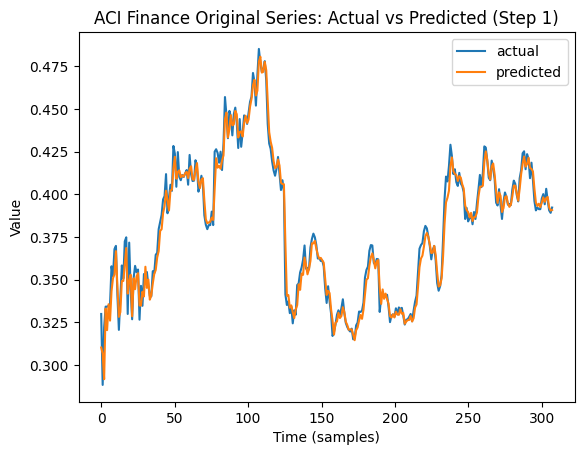

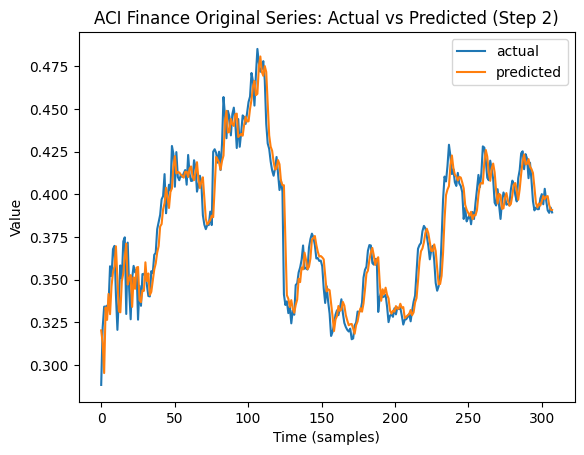

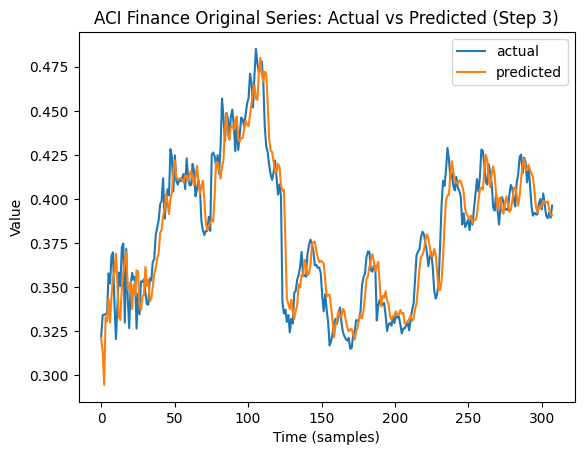

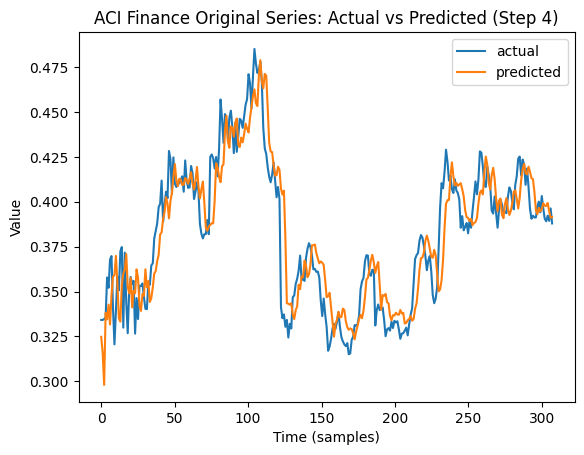

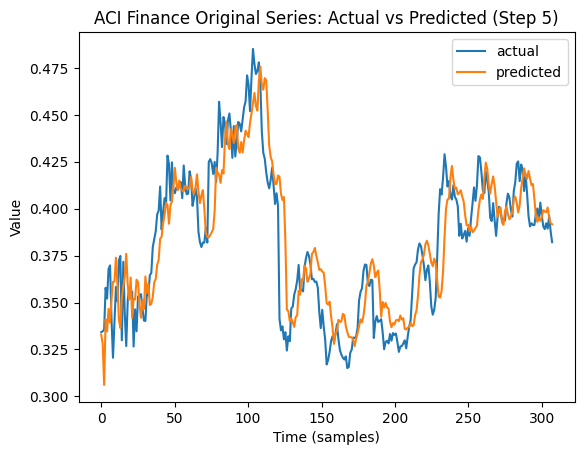

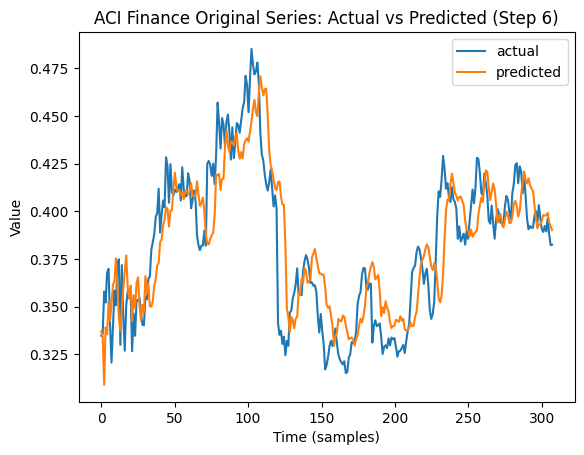

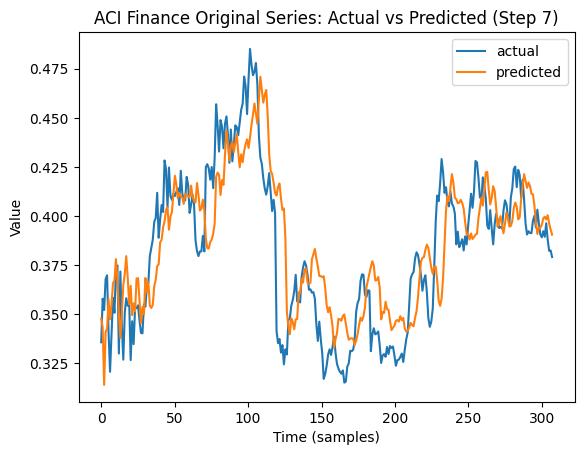

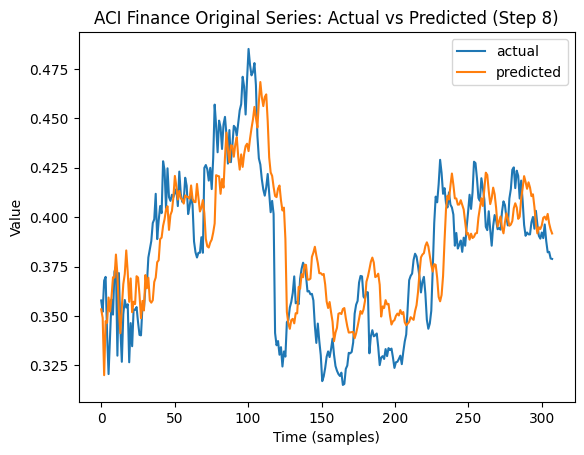

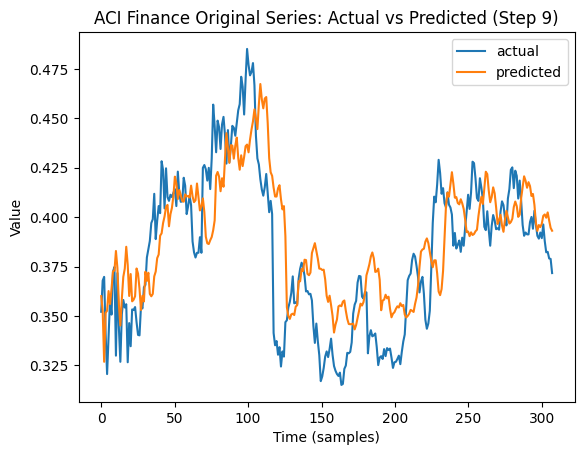

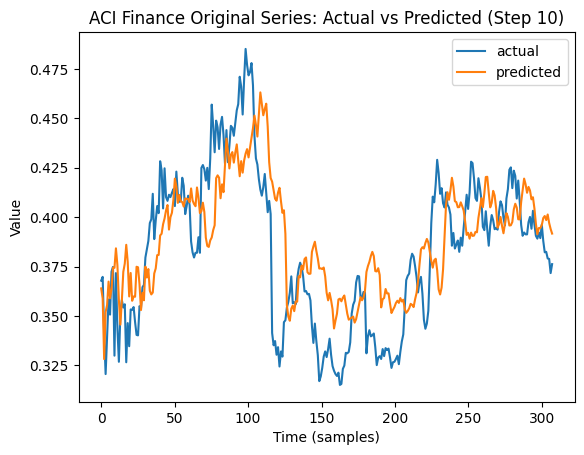

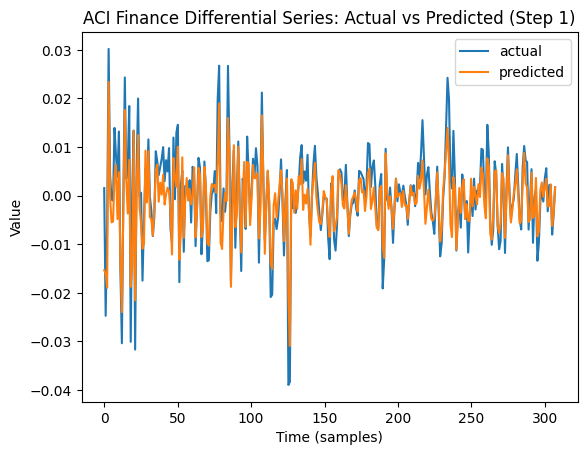

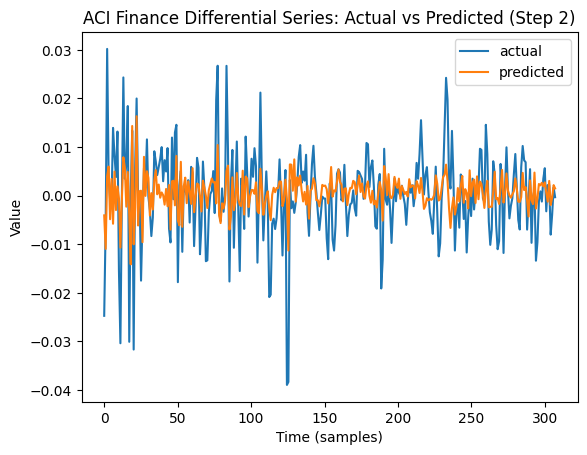

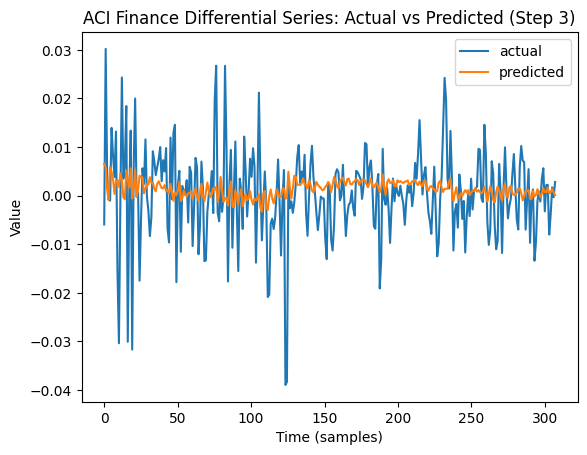

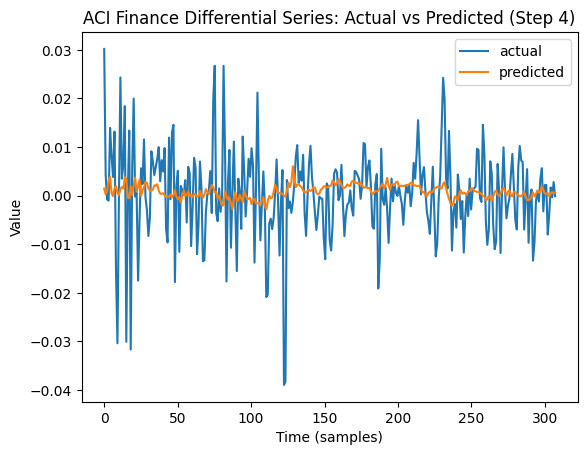

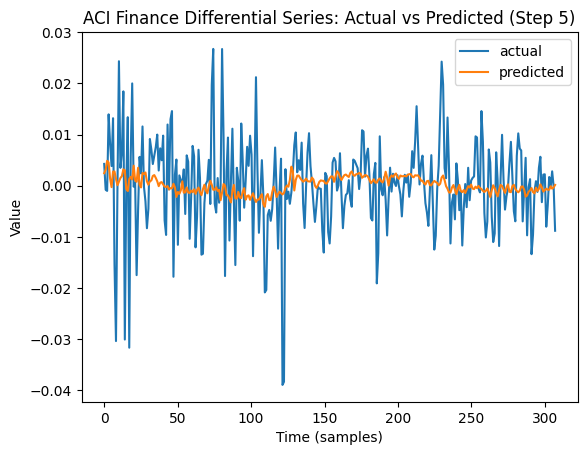

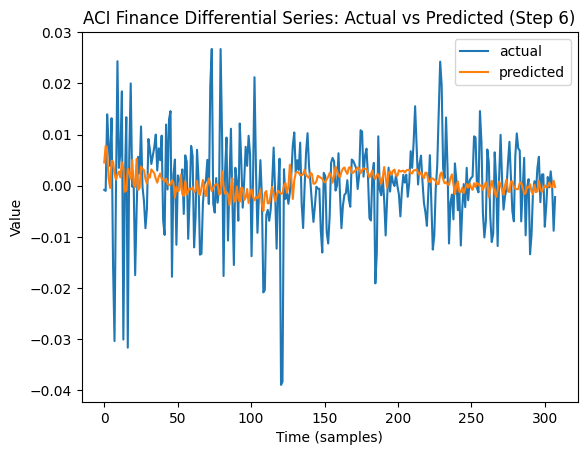

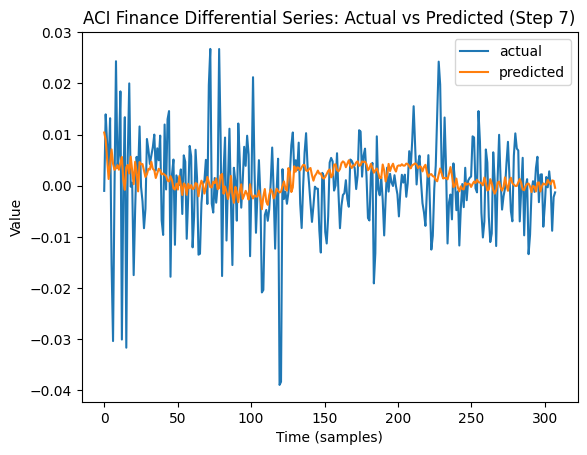

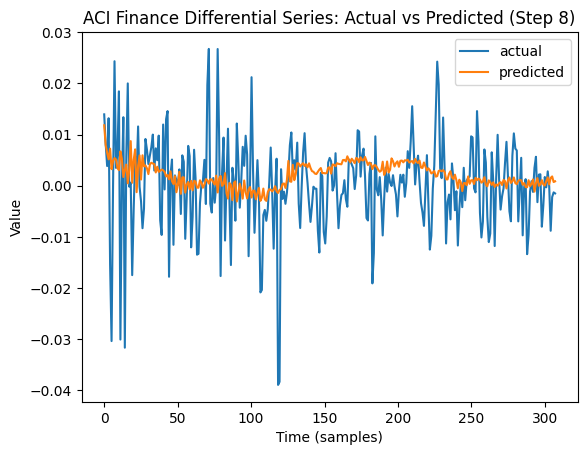

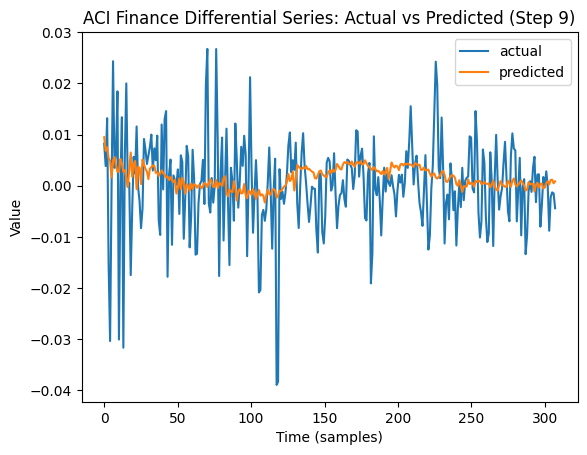

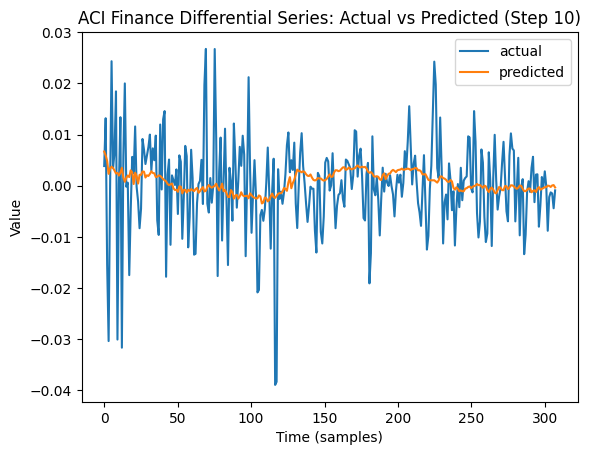

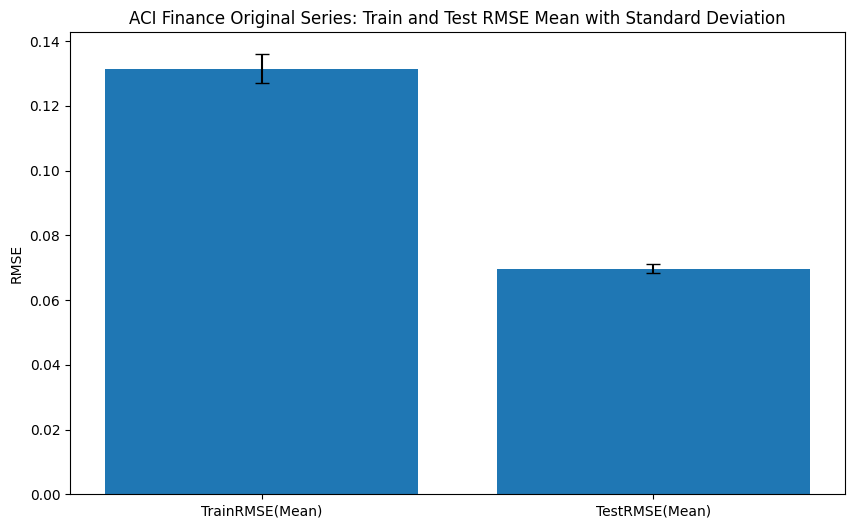

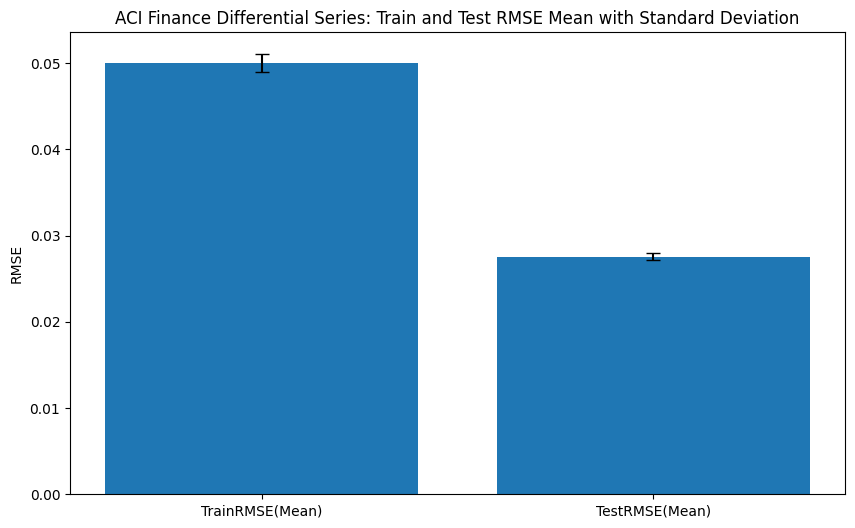

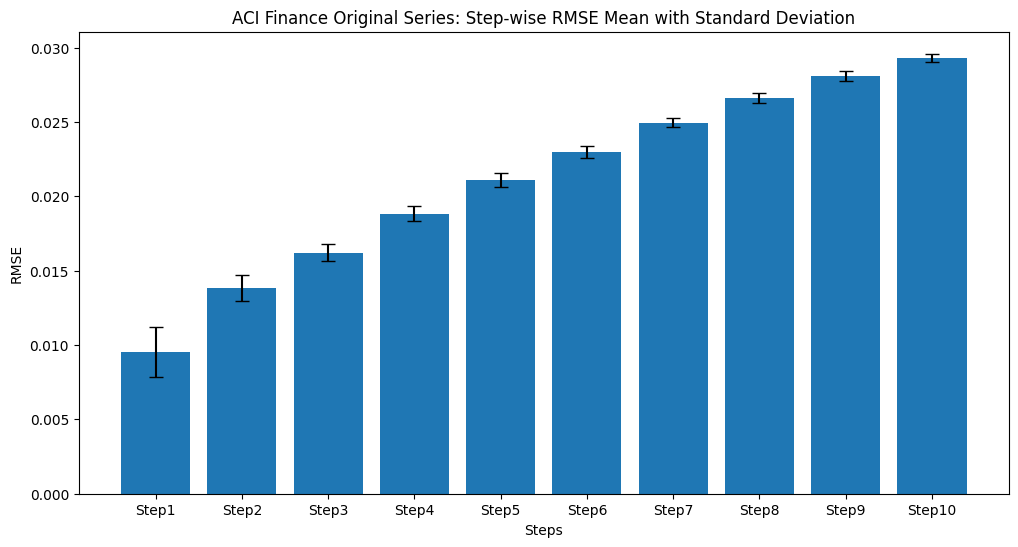

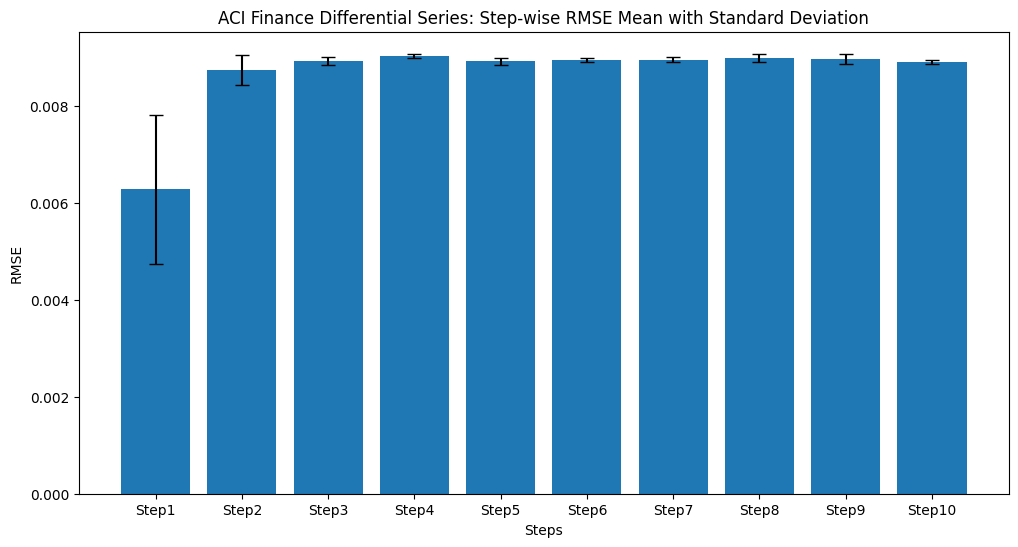

In [30]:
# Complete process
def analyze_and_visualize_results(train_acc_original, test_acc_original, Step_RMSE_original,
                                  train_acc_diff, test_acc_diff, Step_RMSE_diff,
                                  Best_Predict_Test, y_test_original, y_test_diff,
                                  Num_Exp, n_steps_out, name):

    # Prepare and save results
    arr_original_df, arr_diff_df = prepare_and_save_results(
        train_acc_original, test_acc_original, Step_RMSE_original,
        train_acc_diff, test_acc_diff, Step_RMSE_diff,
        Num_Exp, n_steps_out, name
    )

    # Calculate and save statistics
    stats_original_df, stats_diff_df = calculate_and_save_statistics(
        arr_original_df, arr_diff_df,
        train_acc_original, test_acc_original,
        train_acc_diff, test_acc_diff,
        Step_RMSE_original, Step_RMSE_diff,
        Num_Exp, n_steps_out, name
    )

    # Plot actual vs predicted values
    plot_actual_vs_predicted(Best_Predict_Test, Y_test_original, Y_test_diff, n_steps_out, name)

    # Plot RMSE mean and step-wise RMSE mean
    plot_rmse_means(stats_original_df, stats_diff_df, n_steps_out, name)

# Example usage:
analyze_and_visualize_results(train_acc_original, test_acc_original, Step_RMSE_original,
                              train_acc_diff, test_acc_diff, Step_RMSE_diff,
                              Best_Predict_Test, Y_test_original, Y_test_diff,
                              Num_Exp=30, n_steps_out=10, name="ACI_Finance")


In [31]:
# Prepare and display results
def prepare_results(train_acc, test_acc, Step_RMSE, Num_Exp, n_steps_out):
    arr = np.dstack((train_acc, test_acc))
    arr = arr.reshape(Num_Exp, 2)
    arr = np.concatenate((arr, Step_RMSE), axis=1)
    arr = arr.reshape(Num_Exp, 2 + n_steps_out)

    ExpIndex = np.array(["Exp" + str(j + 1) for j in range(Num_Exp)])
    ExpIndex1 = ['TrainRMSE', 'TestRMSE'] + ["Step" + str(j + 1) for j in range(n_steps_out)]

    arr_df = pd.DataFrame(np.round_(arr, decimals=5), index=ExpIndex, columns=ExpIndex1)

    print("Results:")
    print(arr_df)

    return arr_df

arr_original_df = prepare_results(train_acc_original, test_acc_original, Step_RMSE_original, 30, 10)

Results:
       TrainRMSE  TestRMSE    Step1    Step2    Step3    Step4    Step5  \
Exp1     0.14134   0.07137  0.01241  0.01481  0.01709  0.01966  0.02177   
Exp2     0.13986   0.07100  0.01185  0.01473  0.01710  0.01962  0.02173   
Exp3     0.13827   0.07065  0.01147  0.01459  0.01696  0.01935  0.02155   
Exp4     0.13727   0.07088  0.01131  0.01451  0.01682  0.01930  0.02147   
Exp5     0.13585   0.07114  0.01117  0.01457  0.01681  0.01937  0.02154   
Exp6     0.13514   0.07111  0.01105  0.01455  0.01680  0.01940  0.02159   
Exp7     0.13490   0.07106  0.01089  0.01461  0.01675  0.01935  0.02155   
Exp8     0.13445   0.07081  0.01095  0.01448  0.01669  0.01931  0.02155   
Exp9     0.13396   0.07086  0.01065  0.01449  0.01665  0.01929  0.02152   
Exp10    0.13351   0.07083  0.01060  0.01446  0.01661  0.01925  0.02148   
Exp11    0.13311   0.07077  0.01053  0.01444  0.01658  0.01921  0.02142   
Exp12    0.13287   0.07071  0.01046  0.01448  0.01658  0.01920  0.02135   
Exp13    0.13263

<ipython-input-31-08c7a4d388d6>:18: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df = prepare_results(train_acc_original, test_acc_original, Step_RMSE_original, 30, 10)


In [32]:
# Compute and display statistics
def calculate_statistics(train_acc, test_acc, Step_RMSE, n_steps_out, Num_Exp):
    Train_Mean = np.mean(train_acc)
    Train_Std = np.std(train_acc)
    Train_CI_LB = Train_Mean - 1.96 * (Train_Std / np.sqrt(Num_Exp))
    Train_CI_UB = Train_Mean + 1.96 * (Train_Std / np.sqrt(Num_Exp))

    Test_Mean = np.mean(test_acc)
    Test_Std = np.std(test_acc)
    Test_CI_LB = Test_Mean - 1.96 * (Test_Std / np.sqrt(Num_Exp))
    Test_CI_UB = Test_Mean + 1.96 * (Test_Std / np.sqrt(Num_Exp))

    arr1 = np.vstack((
        [Train_Mean, Train_Std, Train_CI_LB, Train_CI_UB, np.min(train_acc), np.max(train_acc)],
        [Test_Mean, Test_Std, Test_CI_LB, Test_CI_UB, np.min(test_acc), np.max(test_acc)]
    ))

    for j in range(n_steps_out):
        Step_mean = np.mean(Step_RMSE[:, j])
        Step_std = np.std(Step_RMSE[:, j])
        Step_min = np.min(Step_RMSE[:, j])
        Step_CI_LB = Step_mean - 1.96 * (Step_std / np.sqrt(Num_Exp))
        Step_CI_UB = Step_mean + 1.96 * (Step_std / np.sqrt(Num_Exp))
        arr1 = np.vstack((arr1, [Step_mean, Step_std, Step_CI_LB, Step_CI_UB, Step_min, np.max(Step_RMSE[:, j])]))

    return pd.DataFrame(np.round_(arr1, decimals=5), index=arr_original_df.columns,
                        columns=['Mean', 'Standard Deviation', 'CI_LB', 'CI_UB', 'Min', 'Max'])

stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, 10, 30)

print("\nSummary Statistics:")
print(stats_original_df)



Summary Statistics:
              Mean  Standard Deviation    CI_LB    CI_UB      Min      Max
TrainRMSE  0.13141             0.00449  0.12980  0.13301  0.12413  0.14134
TestRMSE   0.06968             0.00134  0.06920  0.07016  0.06721  0.07137
Step1      0.00950             0.00168  0.00890  0.01010  0.00645  0.01241
Step2      0.01384             0.00085  0.01353  0.01414  0.01216  0.01481
Step3      0.01620             0.00058  0.01599  0.01641  0.01526  0.01710
Step4      0.01884             0.00052  0.01866  0.01903  0.01791  0.01966
Step5      0.02110             0.00044  0.02095  0.02126  0.02033  0.02177
Step6      0.02296             0.00040  0.02282  0.02311  0.02217  0.02355
Step7      0.02495             0.00029  0.02485  0.02505  0.02436  0.02532
Step8      0.02663             0.00034  0.02651  0.02675  0.02608  0.02720
Step9      0.02810             0.00032  0.02799  0.02822  0.02751  0.02854
Step10     0.02931             0.00028  0.02921  0.02941  0.02878  0.02965


<ipython-input-32-7de0ef72532a>:29: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, 10, 30)


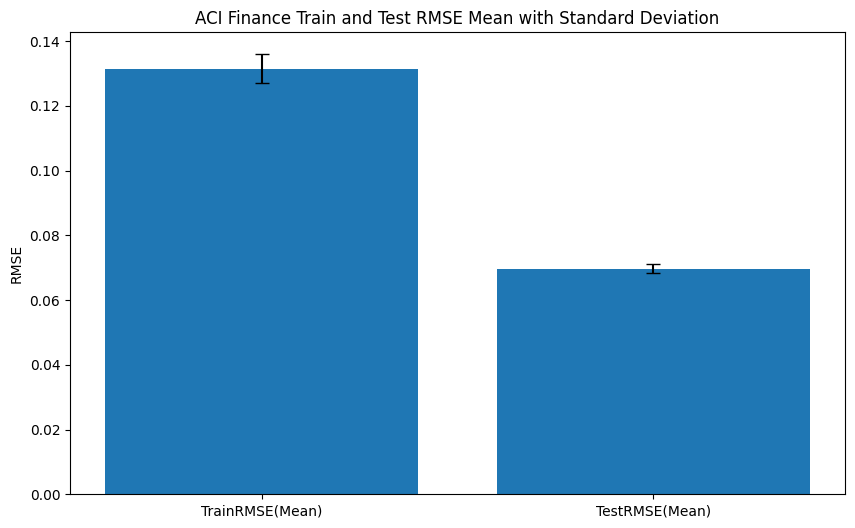

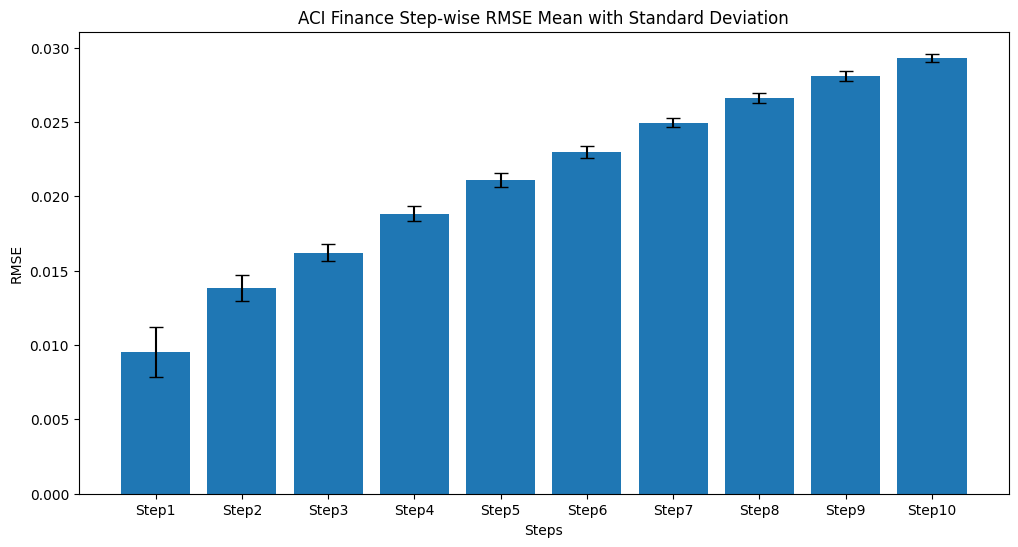

In [33]:
import matplotlib.pyplot as plt

# Plot the results
def plot_rmse_means(stats_df, n_steps_out):
    # Plot TrainRMSE and TestRMSE
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_df['Mean'][:2], yerr=stats_df['Standard Deviation'][:2], capsize=5)
    plt.title('ACI Finance Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.show()

    # Plot Step-wise RMSE Mean
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_df['Mean'][2:], yerr=stats_df['Standard Deviation'][2:], capsize=5)
    plt.title('ACI Finance Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    plt.show()

plot_rmse_means(stats_original_df, 10)